C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

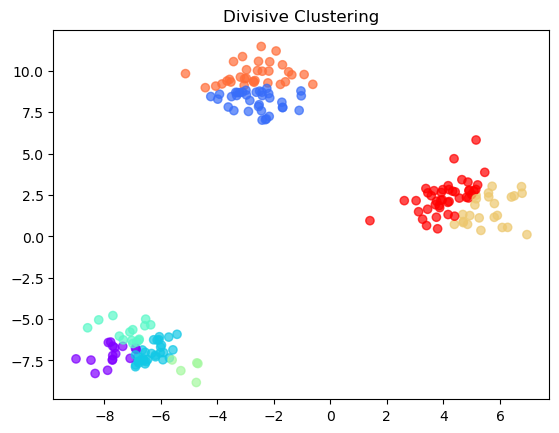

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

def divisive_clustering(X, max_depth=3):
    labels = np.zeros(len(X), dtype=int)
    next_label = 1

    def _split(indices, depth):
        nonlocal next_label
        # Stop splitting if depth reached or cluster too small
        if depth >= max_depth or len(indices) < 5:
            return

        # Split cluster using K-Means into 2 subclusters
        kmeans = KMeans(n_clusters=2, random_state=0).fit(X[indices])
        mask = (kmeans.labels_ == 1)

        # Assign a new label to one of the subclusters
        labels[indices[mask]] = next_label
        next_label += 1

        # Recursively split both subclusters
        _split(indices[~mask], depth + 1)
        _split(indices[mask], depth + 1)

    # Start splitting the entire dataset
    _split(np.arange(len(X)), 0)
    return labels

# Generate sample data
X, _ = make_blobs(n_samples=200, centers=3, random_state=42)

# Apply divisive clustering
labels = divisive_clustering(X, max_depth=3)

# Visualize results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', alpha=0.7)
plt.title('Divisive Clustering')
plt.show()
